# The Introduction of Wolves

John S Butler

# Introduction
This webpage will describe a mathematical model that simulates impact of the introduction of wolves on deer and plants population using Python.

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



## What is mathematics used for?
* Neuroscience
* Engineering
* Physics
* Biology
* Football
* Computer Games
* Animation
* Nature


# Predator Prey 
## Predators and prey
The cyclical relationship of Predators and Prey in the wild  means that when there is an abundance of prey, the predators will eat more and the prey population will increase. On the other hand, if there is a shortage in the number of prey, the number of predators will decrease due to the scarcity of food sources. 


In [2]:
# INITIAL CONDITIONS
N=1000000
h=0.01
time = np.arange(1950, 2100, h )              # time
N=len(time)
plant=80*np.ones(N) # 60 billions small plant
deer=45*np.ones(N) # 30 billion deer
SMALLplant = np.array( [0.9,-0.02,0.03])
deer_constant= np.array([0.005,0.002,-0.001])
for i in range (1,N):
    plant[i]=plant[i-1]+h*plant[i-1]*(SMALLplant[0]+SMALLplant[1]*deer[i-1])
    deer[i]=deer[i-1]+h*deer[i-1]*(deer_constant[0]+deer_constant[1]*(plant[i-1]-40))

## Deers

<img src="deer.jpg" height="400" width="400">
A plot of deers as a function of time.

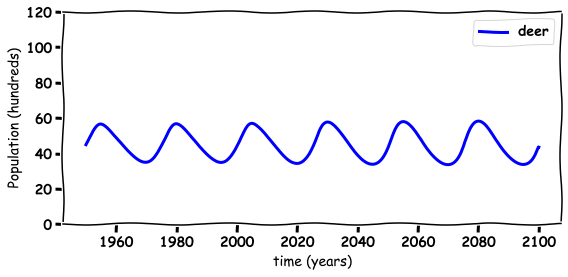

In [3]:
with plt.xkcd():
## PLOTTING
    fig = plt.figure(figsize=(8,4))
    plt.plot(time, deer, 'b-', label='deer',linewidth=3)
    plt.grid()
    plt.xlabel('time (years)')
    plt.ylabel('Population (hundreds)')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim([0,120])
  #  plt.savefig('deer_Hand.png', bbox_inches='tight',dpi=300)
    plt.show()

## What do deers eat?
<img src="deer-eating.jpg" height="400" width="400">

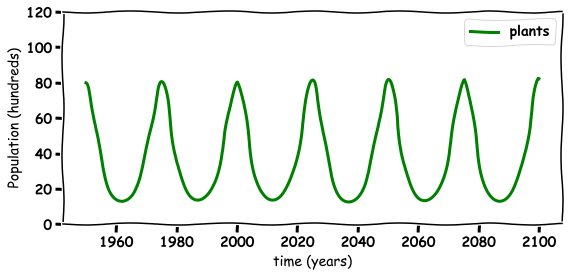

In [4]:
with plt.xkcd():
## PLOTTING
    fig = plt.figure(figsize=(8,4))
    plt.plot(time, plant, 'g-', label='plants',linewidth=3)
    plt.grid()
    plt.xlabel('time (years)')
    plt.ylabel('Population (hundreds)')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim([0,120])
  #  plt.savefig('deer_.png', bbox_inches='tight',dpi=300)
    plt.show()

## Deer and Plants
In a balanced eco system the relationship between small fish (prey) and salmon (predator) can be described mathematically using a Loketta-Volterra model [2-4]
\begin{equation}
\begin{array}{cl}
\frac{d P}{dt}=0.9P-0.02PD,\\
\frac{d D}{dt}=0.001D+0.001 PD,\\
\end{array}
\end{equation}
this set of equations models the interaction between plants (P) and deer (D). 

The equations can be written in words as:

| The rate of change of population | is equal to  | the current population with a control factor|
|-----------------------------------|--------------|------------------------------------------------------------------|
| The increase in plant population  $\frac{d P}{dt}$ | is equal to  | the current plant population $0.9P$ minus the amount of plants the deer eat $-0.02DP$ |
| The increase in deer population $\frac{d D}{dt}$ | is equal to | the current Deer population $0.005D$ plus the amount of fish salmon eat $+0.0001DP$|

Or they can be summed up as the salmon are the predators who eat the small fish to survive.


## Deer and Plants
### How does maths predict the future?
__Adding and Subtraction__ 
\begin{equation}
\begin{array}{cl}
P_{Future}=P_{Current}+0.9P_{Current},\\
D_{Future}=D_{Current}+0.005D_{Current}
\end{array}
\end{equation}
this set of equations models the interaction between plants (P) and deer (D). 


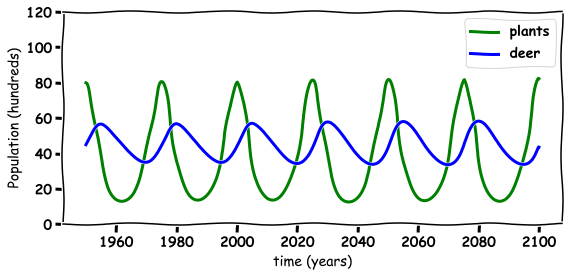

In [5]:
with plt.xkcd():
    fig = plt.figure(figsize=(8,4))
    plt.plot(time, plant, 'g-', label='plants',linewidth=3)
    plt.plot(time, deer, 'b-', label='deer',linewidth=3)
    plt.grid()
    plt.xlabel('time (years)')
    plt.ylabel('Population (hundreds)')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim([0,120])
  #  plt.savefig('plant_deer.png', bbox_inches='tight',dpi=300)
    plt.show()

## What does this look like?

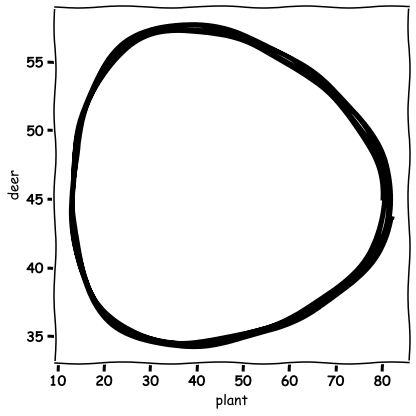

In [6]:
with plt.xkcd():
    fig = plt.figure(figsize=(6,6))
    plt.plot(plant, deer, 'k-', linewidth=3)
    plt.grid()
    plt.xlabel('plant')
    plt.ylabel('deer')
    plt.tight_layout()
    #plt.savefig('plant_vs_deer.png', bbox_inches='tight',dpi=300)
    plt.show()

This is a balanced ecosystem.

# Wolves
<img src="Wolf.jpg" height="400" width="400">

In [7]:
# INITIAL CONDITIONS
N=1000000
h=0.01
time = np.arange(1950, 2100, h )              # time
N=len(time)
plant=80*np.ones(N) # 60 billions small plant
deer=45*np.ones(N) # 30 billion deer
wolves=5*np.ones(N) # 30 billion deer
#wolves[time<2020]=0
SMALLplant = np.array( [0.9,-0.02,0.03])
deer_constant= np.array([0.005,0.002,-0.001])
wolves_constant= np.array([-0.05,0.001,0.0])

for i in range (1,N):
     if time[i-1]<2020:
        wolves[i-1]=0
     else:
         wolves[i]=wolves[i-1]+h*wolves[i-1]*(wolves_constant[0]+wolves_constant[1]*(deer[i-1]))
    
     plant[i]=plant[i-1]+h*plant[i-1]*(SMALLplant[0]+SMALLplant[1]*deer[i-1]+SMALLplant[2]*wolves[i-1])
     deer[i]=deer[i-1]+h*deer[i-1]*(deer_constant[0]+deer_constant[1]*(plant[i-1]-60)+deer_constant[2]*wolves[i-1])

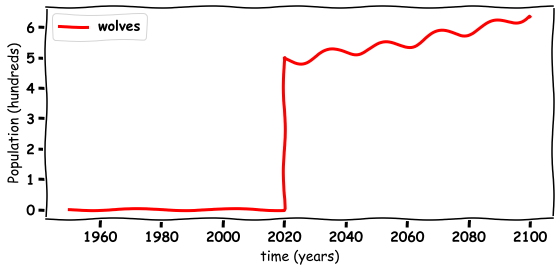

In [8]:
with plt.xkcd():
    fig = plt.figure(figsize=(8,4))
    plt.plot(time, wolves, 'r-', label='wolves',linewidth=3)
    plt.grid()
    plt.xlabel('time (years)')
    plt.ylabel('Population (hundreds)')
    plt.legend(loc='best')
    plt.tight_layout()
  #  plt.savefig('Wolves_Hand.png', bbox_inches='tight',dpi=300)
    plt.show()

## How does the introduction of Wolves impact Deer?

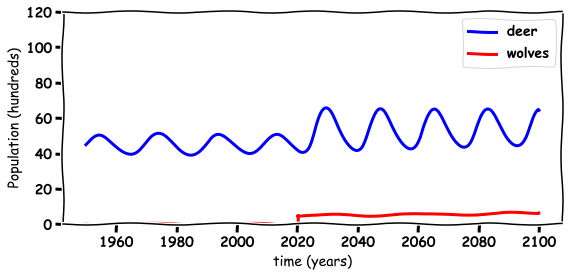

In [9]:
with plt.xkcd():
    ## PLOTTING
    fig = plt.figure(figsize=(8,4))
    plt.plot(time, deer, 'b-', label='deer',linewidth=3)
    plt.plot(time, wolves, 'r-', label='wolves',linewidth=3)
    plt.grid()
    plt.xlabel('time (years)')
    plt.ylabel('Population (hundreds)')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.ylim([0,120])
    #plt.savefig('Deer_Wolves_Hand.png', bbox_inches='tight',dpi=300)
    plt.show()
    

## Why do Wolves benefit?

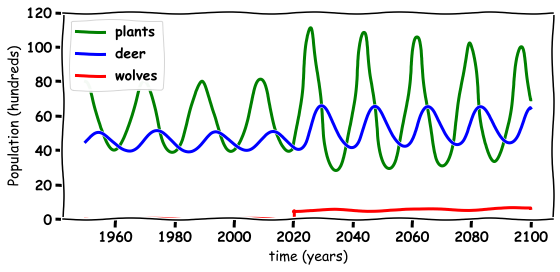

In [10]:
with plt.xkcd():
    fig = plt.figure(figsize=(8,4))
    plt.plot(time, plant, 'g-', label='plants',linewidth=3)
    plt.plot(time, deer, 'b-', label='deer',linewidth=3)
    plt.plot(time, wolves, 'r-', label='wolves',linewidth=3)
    plt.grid()
    plt.ylim([0,120])
    plt.xlabel('time (years)')
    plt.ylabel('Population (hundreds)')
    plt.legend(loc='best')
    plt.tight_layout()
#    plt.savefig('Plants_Deer_Wolves_hand.png', bbox_inches='tight',dpi=300)

    plt.show()

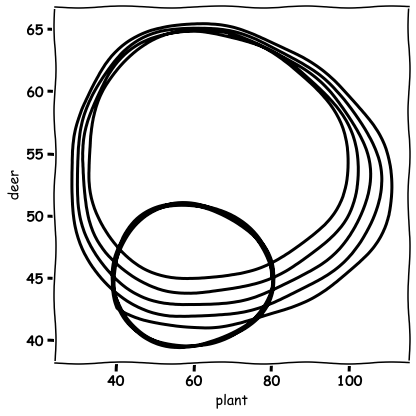

In [11]:
with plt.xkcd():
    fig = plt.figure(figsize=(6,6))
    plt.plot(plant, deer, 'k-', linewidth=3)
    plt.grid()
    plt.xlabel('plant')
    plt.ylabel('deer')
    plt.tight_layout()
    plt.savefig('plant_vs_deer.png', bbox_inches='tight',dpi=300)
    plt.show()

## Yellowstone Park

In [12]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ysa5OBhXz-Q" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/Users/johnbutler/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# How does this describe our neck muscles

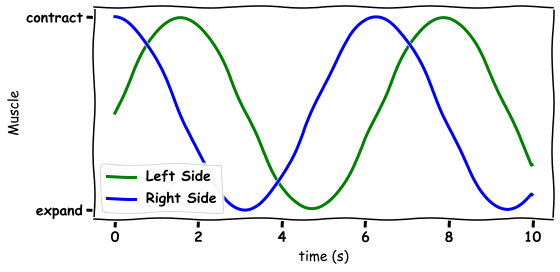

In [13]:
h=0.01
time = np.arange(0, 10, h )              # time
N=len(time)
Left=np.sin(time)
Right=np.cos(time)

with plt.xkcd():
    fig = plt.figure(figsize=(8,4))
    plt.plot(time, Left, 'g-', label='Left Side',linewidth=3)
    plt.plot(time, Right, 'b-', label='Right Side',linewidth=3)
    plt.grid()
    plt.xlabel('time (s)')
    plt.ylabel('Muscle')
    plt.yticks([-1,1],['expand','contract'])
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()